In [1]:
%matplotlib inline
from pylab import *
import math
import numpy as np

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import decay_properties as decay
reload(decay)

import trigger_properties as RF
reload(RF)

<module 'trigger_properties' from 'trigger_properties.pyc'>

In [14]:
phi_src = radians(180)
h = 35.5 #km
R = 6356. # km
ice =4
E_nu = 18 #log energy in eV of incident neutrino 
E_cut = 14
f_lo = 180
f_high = 1200
Gain_dB = 10
Nphased = 1

In [33]:
theta_src = np.radians(83.6)
E_nu = 18
N = 50000000
Epk_to_pk_threshold3 = 248e-6
Epk_to_pk_threshold1 = 446e-6
view_angle_cut = radians(1.5)

tot_ret_shower_eng=[]
tot_ret_tau_energy=[]
tot_Peak_V_t=[]
tot_decay_view_angle_t=[]
tot_Peak_V_s=[]
tot_decay_view_angle_s=[]

detections=0
rounds = 0
while detections == 0:
    print rounds
    rounds = rounds+1
    geom_area = geom_trap.Area(theta_src, h,R,view_angle_cut, N)
    A_deg, phi_e, theta_e, view_angle, exit_angle, emg_angle, norm, e_dot, A0, N0 = geom_area.event_retention()

    decay_cuts = decay.tau_event(theta_src, ice, E_cut, e_dot, phi_e, theta_e, \
                             norm,E_nu, h, R, view_angle_cut, exit_angle, emg_angle, view_angle, A_deg, A0, N0,1)
    
    A_decay,ret_e_dot, ret_phi_e, ret_t_e, ret_tau_energy, ret_exit_obs, ret_exit_decay, ret_decay_obs, \
    ret_exit, ret_emg, ret_view, ret_decay_alt, ret_decay_angle, ret_shower_eng,ret_types, ret_p_exit, A0, N0 = decay_cuts.degree_eff_area()

    trigger_result_t = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        view_angle_cut, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_tau_energy, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold1, A0,N0)

    decay_alt, Peak_V_t, delta_decay_view_angle, decay_view_angle_t, trigger, threshhold = trigger_result_t.RF_voltage()

    trigger_result_s = RF.event_detection(A_decay, f_lo, f_high, Gain_dB, Nphased, \
                                        ret_exit,ret_emg,ret_view, ret_decay_angle, ret_decay_alt, \
                                        theta_view, ret_exit_obs,ret_exit_decay, ret_decay_obs, ret_p_exit, ret_e_dot,\
                                        ret_shower_eng, R, ice, h, ret_t_e, ret_phi_e,theta_src, Epk_to_pk_threshold1, A0,N0)

    
    print len(ret_tau_energy), len(ret_shower_eng)
    decay_alt, Peak_V_s, delta_decay_view_angle, decay_view_angle_s, trigger, threshhold = trigger_result_s.RF_voltage()
    tot_ret_shower_eng.append(ret_shower_eng)
    tot_ret_tau_energy.append(ret_tau_energy)
    tot_Peak_V_t.append(Peak_V_t)
    tot_decay_view_angle_t.append(decay_view_angle_t)
    tot_Peak_V_s.append(Peak_V_s)
    tot_decay_view_angle_s.append(decay_view_angle_s)
    
    if sum(Peak_V_s >threshhold) !=0:
        detections = 1
        A = trigger_result_s.RF_eff_area()
        print A


0
263901 263901
0.00011241117654158255


In [34]:
list_ret_shower_eng=[]
list_ret_tau_energy=[]
list_Peak_V_t=[]
list_decay_view_angle_t=[]
list_Peak_V_s=[]
list_decay_view_angle_s=[]

print tot_ret_shower_eng
print Peak_V_t
for k in range(len(tot_ret_shower_eng)):
    print k
    for i in range(len(tot_ret_shower_eng[k])):
        list_ret_shower_eng.append(tot_ret_shower_eng[k][i])
        list_ret_tau_energy.append(tot_ret_tau_energy[k][i])
        list_Peak_V_t.append(tot_Peak_V_t[k][i] )
        list_decay_view_angle_t.append(tot_decay_view_angle_t[k][i] )
        list_Peak_V_s.append(tot_Peak_V_s[k][i] )
        list_decay_view_angle_s.append(tot_decay_view_angle_s[k][i] )

[array([17.10040563, 17.21372589, 17.56358535, ..., 17.44950983,
       17.50836023, 17.09203324])]
[3.38325072e-07 6.31022059e-06 1.69272263e-06 ... 1.89892915e-06
 2.31937532e-06 5.71615883e-07]
0


0.00010641390185008879 1


Text(0.5,1,'A1 Tau Showers')

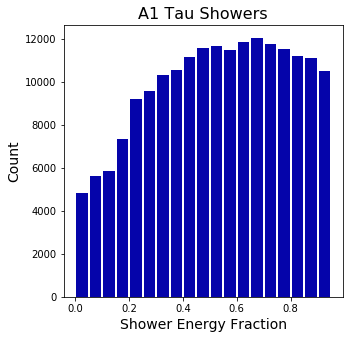

In [18]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.xlabel('Shower Energy Fraction', fontsize=14)
plt.ylabel('Count', fontsize=14)
energy_fractions = [(10**ret_shower_eng[i])/(10**ret_tau_energy[i])  for i in range(len(ret_tau_energy))]
min_bin = min(energy_fractions)
max_bin = 1 #max(energy_fractions)
print min_bin ,max_bin
n, bins, patches = plt.hist(x=energy_fractions, bins=arange(min_bin,max_bin,0.05), color='#0504aa',
                   rwidth=0.85)


plt.title("A1 Tau Showers", fontsize=16)



In [35]:
trigger_t = (list_Peak_V_t >threshhold)
ret_decay_view_angle_t=[]
ret_Peak_V_t =[]

for k in range(len(trigger_t)):
    if trigger_t[k]==True:
        ret_decay_view_angle_t.append(list_decay_view_angle_t[k])
        ret_Peak_V_t.append(list_Peak_V_t[k])
        
trigger_s = (list_Peak_V_s >threshhold)
ret_decay_view_angle_s=[]
ret_Peak_V_s =[]

for k in range(len(trigger_s)):
    if trigger_s[k]==True:
        ret_decay_view_angle_s.append(list_decay_view_angle_s[k])
        ret_Peak_V_s.append(list_Peak_V_s[k])

Text(0.5,1,'Before Shower Fraction NH')

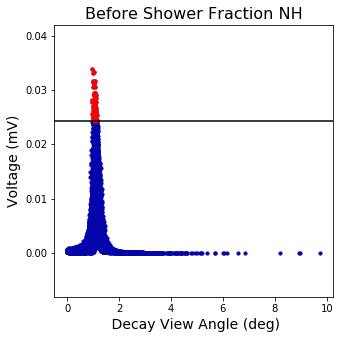

In [12]:
from matplotlib import ticker

fig, ax = plt.subplots(num=1,figsize=(5,5))
#plt.xlim([1,10])
plt.ylabel('Voltage (mV)', fontsize=14)
plt.xlabel(' Decay View Angle (deg)', fontsize=14)
plt.scatter(list_decay_view_angle_t, [1000*list_Peak_V_t[k] for k in range(len(list_Peak_V_t))], color='#0504aa', s=10)
plt.scatter(ret_decay_view_angle_t, [1000*ret_Peak_V_t[k] for k in range(len(ret_Peak_V_t))],
            c="red", s=10)

plt.axhline(y=threshhold*1000,color="black")
plt.title("Before Shower Fraction NH", fontsize=16)

#plt.xticks([5])
#plt.semilogx()


Text(0.5,1,'After Shower Fraction NH, $\\theta_{ele}=1.5^{\\circ}$')

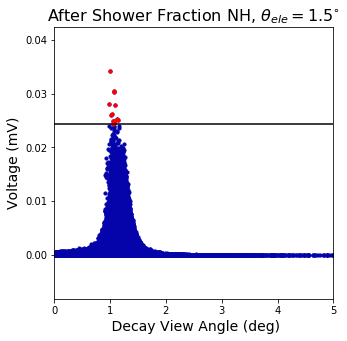

In [37]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.ylabel('Voltage (mV)', fontsize=14)
plt.xlabel(' Decay View Angle (deg)', fontsize=14)
plt.scatter(list_decay_view_angle_s, [1000*list_Peak_V_s[k] for k in range(len(list_Peak_V_s))], color='#0504aa', s=10)
plt.scatter(ret_decay_view_angle_s, [1000*ret_Peak_V_s[k] for k in range(len(ret_Peak_V_s))],
            c="red", s=10)
plt.xlim(0,5)

plt.axhline(y=threshhold*1000,color="black")
plt.title("After Shower Fraction NH, "+r'$\theta_{ele}=1.5^{\circ}$', fontsize=16)

In [ ]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.xlabel('Voltage (mV)', fontsize=14)
plt.ylabel('Count', fontsize=14)
Peak_V_mv_t = [1000*list_Peak_V_t[k] for k in range(len(list_Peak_V_t))]
ret_Peak_V_mv_t = [1000*ret_Peak_V_t[k] for k in range(len(ret_Peak_V_t))]
min_bin = 1000*min(Peak_V_t)
max_bin = 1000*max(Peak_V_t)


n, bins, patches = plt.hist(x=Peak_V_mv_t, bins=np.arange(min_bin,max_bin,0.0015), color='#0504aa',rwidth=0.85)
n, bins, patches = plt.hist(x=ret_Peak_V_mv_t, bins=np.arange(min_bin,max_bin,0.0015), color='red',
                   rwidth=0.85)
plt.axvline(x=threshhold*1000,color="black")

# from matplotlib.ticker import FormatStrFormatter

ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))


plt.title("Before Shower Fraction NH RF Voltages", fontsize=16)
plt.semilogy()

In [ ]:
fig, ax = plt.subplots(num=1,figsize=(5,5))
        
plt.xlabel('Voltage (mV)', fontsize=14)
plt.ylabel('Count', fontsize=14)
Peak_V_mv_s = [1000*list_Peak_V_s[k] for k in range(len(list_Peak_V_s))]
ret_Peak_V_mv_s = [1000*ret_Peak_V_s[k] for k in range(len(ret_Peak_V_s))]
min_bin = 1000*min(Peak_V_s)
max_bin = 1000*max(Peak_V_t)


n, bins, patches = plt.hist(x=Peak_V_mv_s, bins=np.arange(min_bin,max_bin,0.001), color='#0504aa',rwidth=0.85)
n, bins, patches = plt.hist(x=ret_Peak_V_mv_s, bins=np.arange(min_bin,max_bin,0.001), color='red',
                   rwidth=0.85)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.axvline(x=threshhold*1000,color="black")
plt.title("After Shower Fraction NH RF Voltages", fontsize=16)
plt.semilogy()

In [ ]:
# METERS SQUARED 
val = 5.1731059586696745e-05
print val * (1000)**2
print val * (1000)**2 * (100)**2 * 3600 * 24 * 22